# Insurance Claim Fraud Detection

# Project Description
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 


# AIM :
To create a predictive model that predicts if an insurance claim is fraudulent or not. 

# Importing essential libraries

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Reading csv file

In [10]:
loan_data= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

In [11]:
loan_data.head(10).T

0                  1  \
months_as_customer                                328                228   
age                                                48                 42   
policy_number                                  521585             342868   
policy_bind_date                           17-10-2014         27-06-2006   
policy_state                                       OH                 IN   
policy_csl                                    250/500            250/500   
policy_deductable                                1000               2000   
policy_annual_premium                         1406.91            1197.22   
umbrella_limit                                      0            5000000   
insured_zip                                    466132             468176   
insured_sex                                      MALE               MALE   
insured_education_level                            MD                 MD   
insured_occupation                       craft-repair  machine-op-inspct   
insured_hobbies                              sleeping            reading   
insured_relationship                          husband     other-relative   
capital-gains                                   53300                  0   
capital-loss                                        0                  0   
incident_date                              25-01-2015         21-01-2015   
incident_type                Single Vehicle Collision      Vehicle Theft   
collision_type                         Side Collision                  ?   
incident_severity                        Major Damage       Minor Damage   
authorities_contacted                          Police             Police   
incident_state                                     SC                 VA   
incident_city                                Columbus          Riverwood   
incident_location                      9935 4th Drive       6608 MLK Hwy   
incident_hour_of_the_day                            5                  8   
number_of_vehicles_involved                         1                  1   
property_damage                                   YES                  ?   
bodily_injuries                                     1                  0   
witnesses                                           2                  0   
police_report_available                           YES                  ?   
total_claim_amount                              71610               5070   
injury_claim                                     6510                780   
property_claim                                  13020                780   
vehicle_claim                                   52080               3510   
auto_make                                        Saab           Mercedes   
auto_model                                        92x               E400   
auto_year                                        2004               2007   
fraud_reported                                      Y                  Y   
_c39                                              NaN                NaN   

                                                   2  \
months_as_customer                               134   
age                                               29   
policy_number                                 687698   
policy_bind_date                          06-09-2000   
policy_state                                      OH   
policy_csl                                   100/300   
policy_deductable                               2000   
policy_annual_premium                        1413.14   
umbrella_limit                               5000000   
insured_zip                                   430632   
insured_sex                                   FEMALE   
insured_education_level                          PhD   
insured_occupation                             sales   
insured_hobbies                          board-games   
insured_relationship                       own-child   
capital-gains                          

# Rows & Columns

In [12]:
loan_data.shape

(1000, 40)

# Gives informaton of the dataset it's type etc

In [13]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Note: There are 3 data types in the data

object: Object format means variables are categorical. Categorical variables in our dataset are: Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status

int64: It represents the integer variables. ApplicantIncome is of this format.

float64: It represents the variable which have some decimal values involved. They are also numerical variables. Numerical variables in our dataset are: CoapplicantIncome, LoanAmount, Loan_Amount_Term, and Credit_History

Why Data Types are important?

Datatypes are an important concept because statistical methods can only be used with certain data types. You have to analyze continuous data differently than categorical data otherwise it would result in a wrong analysis. Therefore knowing the types of data you are dealing with, enables you to choose the correct method of anal

# Checking null values

In [14]:
loan_data.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [15]:
loan_data.drop(['_c39'], axis=1,inplace=True)


# Missing value check

In [16]:
loan_data.isin(['?']).sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [17]:
loan_data = loan_data.replace('?',np.NaN)

In [18]:
loan_data.isna().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [19]:
missing_values = loan_data.isna().sum().sort_values(ascending=False)
percentage_missing_values= (missing_values/len(loan_data))*100
print(pd.concat([missing_values,percentage_missing_values], axis=1, keys=['Missing Values','%Missingdata']))

                             Missing Values  %Missingdata
property_damage                         360          36.0
police_report_available                 343          34.3
collision_type                          178          17.8
auto_model                                0           0.0
auto_make                                 0           0.0
vehicle_claim                             0           0.0
property_claim                            0           0.0
injury_claim                              0           0.0
total_claim_amount                        0           0.0
incident_severity                         0           0.0
witnesses                                 0           0.0
bodily_injuries                           0           0.0
auto_year                                 0           0.0
number_of_vehicles_involved               0           0.0
incident_hour_of_the_day                  0           0.0
incident_location                         0           0.0
incident_city 

In [20]:
loan_data['property_damage'].fillna(loan_data['property_damage'].mode()[0],inplace=True)
loan_data['police_report_available'].fillna(loan_data['police_report_available'].mode()[0],inplace=True)
loan_data['collision_type'].fillna(loan_data['collision_type'].mode()[0],inplace=True)

In [21]:
loan_data.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

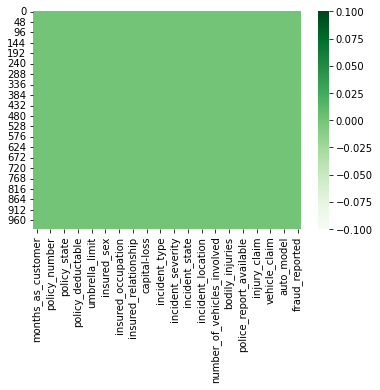

In [22]:
sns.heatmap(loan_data.isnull(), cmap="Greens")
plt.show()

In [23]:
loan_data.head(10).T

0                  1  \
months_as_customer                                328                228   
age                                                48                 42   
policy_number                                  521585             342868   
policy_bind_date                           17-10-2014         27-06-2006   
policy_state                                       OH                 IN   
policy_csl                                    250/500            250/500   
policy_deductable                                1000               2000   
policy_annual_premium                         1406.91            1197.22   
umbrella_limit                                      0            5000000   
insured_zip                                    466132             468176   
insured_sex                                      MALE               MALE   
insured_education_level                            MD                 MD   
insured_occupation                       craft-repair  machine-op-inspct   
insured_hobbies                              sleeping            reading   
insured_relationship                          husband     other-relative   
capital-gains                                   53300                  0   
capital-loss                                        0                  0   
incident_date                              25-01-2015         21-01-2015   
incident_type                Single Vehicle Collision      Vehicle Theft   
collision_type                         Side Collision     Rear Collision   
incident_severity                        Major Damage       Minor Damage   
authorities_contacted                          Police             Police   
incident_state                                     SC                 VA   
incident_city                                Columbus          Riverwood   
incident_location                      9935 4th Drive       6608 MLK Hwy   
incident_hour_of_the_day                            5                  8   
number_of_vehicles_involved                         1                  1   
property_damage                                   YES                 NO   
bodily_injuries                                     1                  0   
witnesses                                           2                  0   
police_report_available                           YES                 NO   
total_claim_amount                              71610               5070   
injury_claim                                     6510                780   
property_claim                                  13020                780   
vehicle_claim                                   52080               3510   
auto_make                                        Saab           Mercedes   
auto_model                                        92x               E400   
auto_year                                        2004               2007   
fraud_reported                                      Y                  Y   

                                                   2  \
months_as_customer                               134   
age                                               29   
policy_number                                 687698   
policy_bind_date                          06-09-2000   
policy_state                                      OH   
policy_csl                                   100/300   
policy_deductable                               2000   
policy_annual_premium                        1413.14   
umbrella_limit                               5000000   
insured_zip                                   430632   
insured_sex                                   FEMALE   
insured_education_level                          PhD   
insured_occupation                             sales   
insured_hobbies                          board-games   
insured_relationship                       own-child   
capital-gains                                  35100   
capital-loss                                       0   
inc

Seperating year,month and day

In [24]:
# Extracting Day, Month and Year column from policy_bind_date
loan_data['policy_bind_date']=pd.to_datetime(loan_data['policy_bind_date'])
loan_data['policy_bind_day'] = loan_data['policy_bind_date'].dt.day
loan_data['policy_bind_month'] = loan_data['policy_bind_date'].dt.month
loan_data['policy_bind_year'] = loan_data['policy_bind_date'].dt.year

# Extracting Day, Month and Year column from incident_date
loan_data['incident_date']=pd.to_datetime(loan_data['incident_date'])
loan_data['incident_day'] = loan_data['incident_date'].dt.day
loan_data['incident_month'] = loan_data['incident_date'].dt.month
loan_data['incident_year'] = loan_data['incident_date'].dt.year

In [25]:
# Since Extraction is done now we can Drop policy_bind_date and incident_date columns
loan_data.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)

In [26]:
loan_data.shape

(1000, 43)

In [27]:
loan_data.describe().T

count          mean           std         min  \
months_as_customer           1000.0  2.039540e+02  1.151132e+02        0.00   
age                          1000.0  3.894800e+01  9.140287e+00       19.00   
policy_number                1000.0  5.462386e+05  2.570630e+05   100804.00   
policy_deductable            1000.0  1.136000e+03  6.118647e+02      500.00   
policy_annual_premium        1000.0  1.256406e+03  2.441674e+02      433.33   
umbrella_limit               1000.0  1.101000e+06  2.297407e+06 -1000000.00   
insured_zip                  1000.0  5.012145e+05  7.170161e+04   430104.00   
capital-gains                1000.0  2.512610e+04  2.787219e+04        0.00   
capital-loss                 1000.0 -2.679370e+04  2.810410e+04  -111100.00   
incident_hour_of_the_day     1000.0  1.164400e+01  6.951373e+00        0.00   
number_of_vehicles_involved  1000.0  1.839000e+00  1.018880e+00        1.00   
bodily_injuries              1000.0  9.920000e-01  8.201272e-01        0.00   
witnesses                    1000.0  1.487000e+00  1.111335e+00        0.00   
total_claim_amount           1000.0  5.276194e+04  2.640153e+04      100.00   
injury_claim                 1000.0  7.433420e+03  4.880952e+03        0.00   
property_claim               1000.0  7.399570e+03  4.824726e+03        0.00   
vehicle_claim                1000.0  3.792895e+04  1.888625e+04       70.00   
auto_year                    1000.0  2.005103e+03  6.015861e+00     1995.00   
policy_bind_day              1000.0  1.544800e+01  8.850176e+00        1.00   
policy_bind_month            1000.0  6.559000e+00  3.391758e+00        1.00   
policy_bind_year             1000.0  2.001604e+03  7.360391e+00     1990.00   
incident_day                 1000.0  1.308400e+01  1.044318e+01        1.00   
incident_month               1000.0  3.407000e+00  3.276291e+00        1.00   
incident_year                1000.0  2.015000e+03  0.000000e+00     2015.00   

                                     25%       50%         75%          max  
months_as_customer              115.7500     199.5     276.250       479.00  
age                              32.0000      38.0      44.000        64.00  
policy_number                335980.2500  533135.0  759099.750    999435.00  
policy_deductable               500.0000    1000.0    2000.000      2000.00  
policy_annual_premium          1089.6075    1257.2    1415.695      2047.59  
umbrella_limit                    0.0000       0.0       0.000  10000000.00  
insured_zip                  448404.5000  466445.5  603251.000    620962.00  
capital-gains                     0.0000       0.0   51025.000    100500.00  
capital-loss                 -51500.0000  -23250.0       0.000         0.00  
incident_hour_of_the_day          6.0000      12.0      17.000        23.00  
number_of_vehicles_involved       1.0000       1.0       3.000         4.00  
bodily_injuries                   0.0000       1.0       2.000         2.00  
witnesses                         1.0000       1.0       2.000         3.00  
total_claim_amount            41812.5000   58055.0   70592.500    114920.00  
injury_claim                   4295.0000    6775.0   11305.000     21450.00  
property_claim                 4445.0000    6750.0   10885.000     23670.00  
vehicle_claim                 30292.5000   42100.0   50822.500     79560.00  
auto_year                      2000.0000    2005.0    2010.000      2015.00  
policy_bind_day                   8.0000      16.0      23.000        31.00  
policy_bind_month                 4.0000       7.0       9.000        12.00  
policy_bind_year               1995.0000    2002.0    2008.000      2015.00  
incident_day                      2.0000      15.0      22.000        31.00  
incident_month                    1.0000       2.0       5.000        12.00  
incident_year                  2015.0000    2015.0    2015.000      2015.00

In [28]:
# Droping unnecessary columns
loan_data.drop(['incident_location'],axis=1,inplace=True)

In [29]:
Category = ['policy_state',  'insured_sex', 'insured_education_level', 'insured_occupation', 
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted','incident_state', 'incident_city', 'property_damage','police_report_available',
            'auto_make','auto_model', 'fraud_reported']
    
Numerical = ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'injury_claim', 'property_claim', 'vehicle_claim', 'policy_annual_premium','incident_month','incident_day','policy_bind_day','policy_bind_month','policy_bind_year','insured_zip']

In [30]:
loan_data[Category].describe().T

count unique                      top freq
policy_state             1000      3                       OH  352
insured_sex              1000      2                   FEMALE  537
insured_education_level  1000      7                       JD  161
insured_occupation       1000     14        machine-op-inspct   93
insured_hobbies          1000     20                  reading   64
insured_relationship     1000      6                own-child  183
incident_type            1000      4  Multi-vehicle Collision  419
collision_type           1000      3           Rear Collision  470
incident_severity        1000      4             Minor Damage  354
authorities_contacted    1000      5                   Police  292
incident_state           1000      7                       NY  262
incident_city            1000      7              Springfield  157
property_damage          1000      2                       NO  698
police_report_available  1000      2                       NO  686
auto_make                1000     14                     Saab   80
auto_model               1000     39                      RAM   43
fraud_reported           1000      2                        N  753

# pairplot

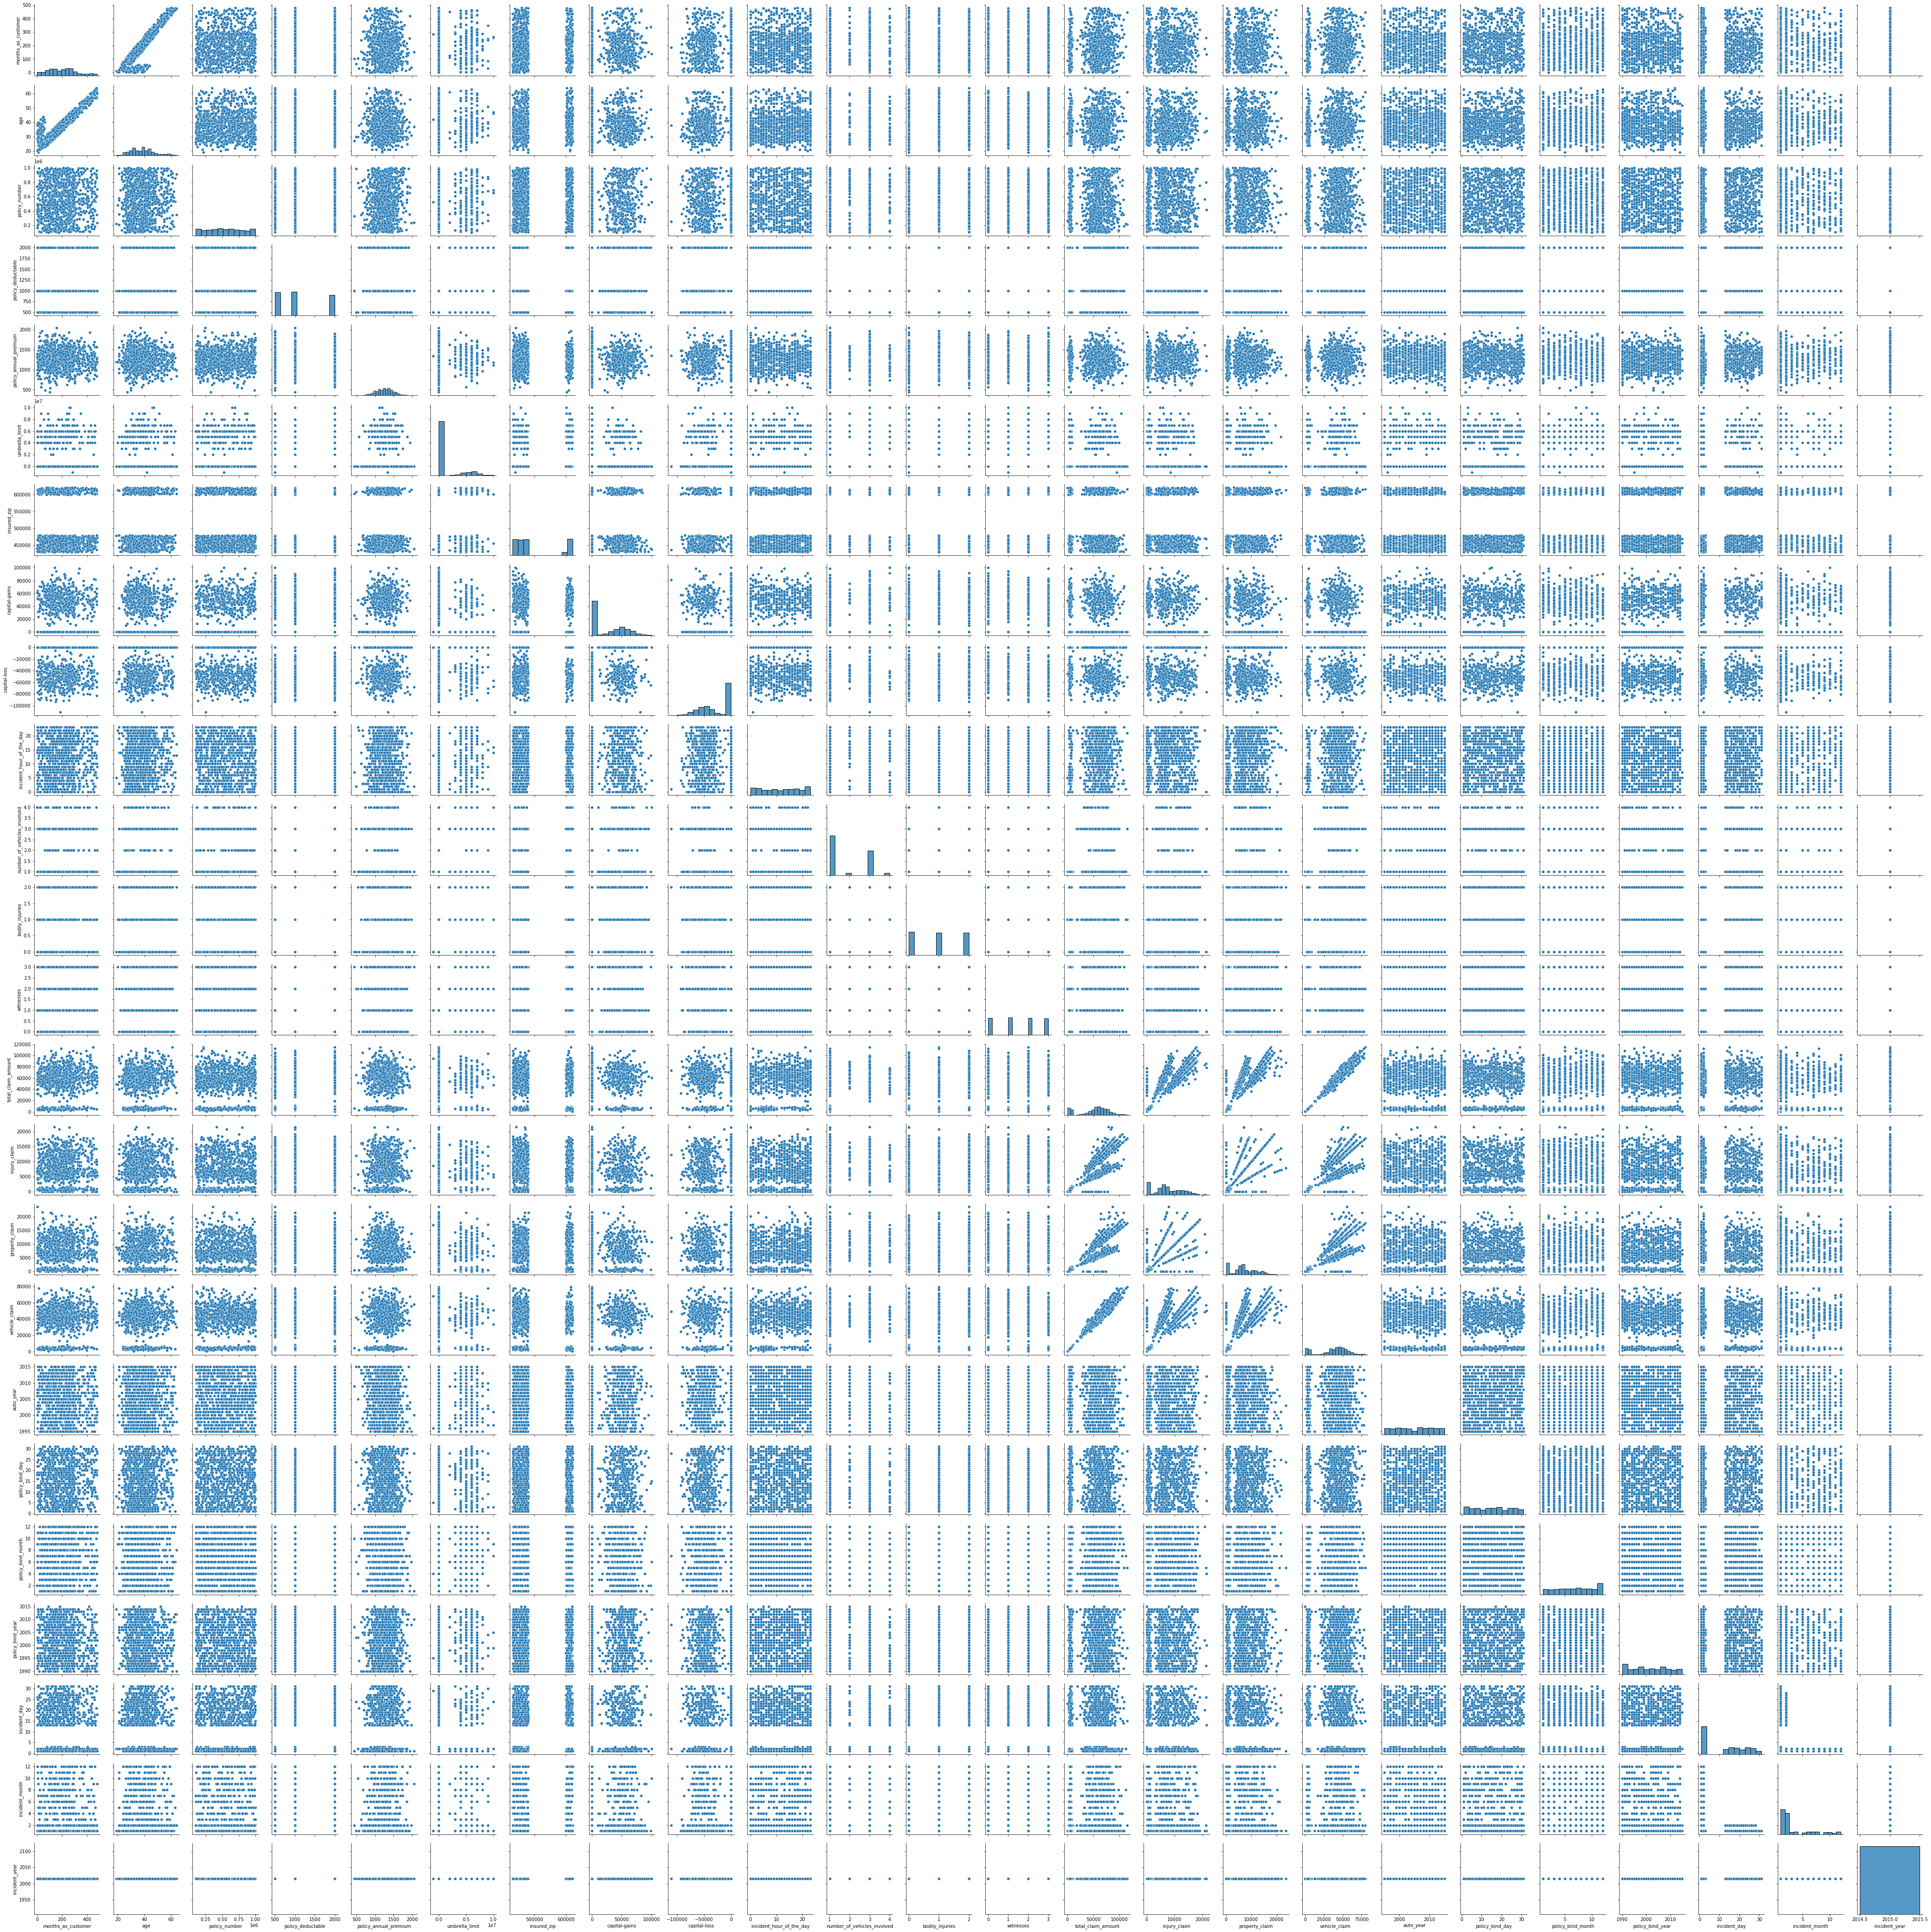

In [31]:
sns.pairplot(loan_data)

# Encoding categorical variable

In [32]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for i in Category:
    loan_data[i] = label.fit_transform(loan_data[i])
loan_data.head().T

0        1        2        3         4
months_as_customer               328      228      134      256       228
age                               48       42       29       41        44
policy_number                 521585   342868   687698   227811    367455
policy_state                       2        1        2        0         0
policy_csl                   250/500  250/500  100/300  250/500  500/1000
policy_deductable               1000     2000     2000     2000      1000
policy_annual_premium        1406.91  1197.22  1413.14  1415.74   1583.91
umbrella_limit                     0  5000000  5000000  6000000   6000000
insured_zip                   466132   468176   430632   608117    610706
insured_sex                        1        1        0        0         1
insured_education_level            4        4        6        6         0
insured_occupation                 2        6       11        1        11
insured_hobbies                   17       15        2        2         2
insured_relationship               0        2        3        4         4
capital-gains                  53300        0    35100    48900     66000
capital-loss                       0        0        0   -62400    -46000
incident_type                      2        3        0        2         3
collision_type                     2        1        1        0         1
incident_severity                  0        1        1        0         1
authorities_contacted              4        4        4        4         2
incident_state                     4        5        1        2         1
incident_city                      1        5        1        0         0
incident_hour_of_the_day           5        8        7        5        20
number_of_vehicles_involved        1        1        3        1         1
property_damage                    1        0        0        0         0
bodily_injuries                    1        0        2        1         0
witnesses                          2        0        3        2         1
police_report_available            1        0        0        0         0
total_claim_amount             71610     5070    34650    63400      6500
injury_claim                    6510      780     7700     6340      1300
property_claim                 13020      780     3850     6340       650
vehicle_claim                  52080     3510    23100    50720      4550
auto_make                         10        8        4        3         0
auto_model                         1       12       30       34        31
auto_year                       2004     2007     2007     2014      2009
fraud_reported                     1        1        0        1         0
policy_bind_day                   17       27        9       25         6
policy_bind_month                 10        6        6        5         6
policy_bind_year                2014     2006     2000     1990      2014
incident_day                      25       21       22        1        17
incident_month                     1        1        2       10         2
incident_year                   2015     2015     2015     2015      2015

# Checking Correlation
Checking Correlation Now lets look at the correlation between all the numerical variables. We can use the corr() to compute pairwise correlation of columns, excluding NA/null values using pearson correlation coefficient. Then we will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

In [34]:
loan_data.corr()

months_as_customer       age  policy_number  \
months_as_customer                     1.000000  0.922098       0.057555   
age                                    0.922098  1.000000       0.059413   
policy_number                          0.057555  0.059413       1.000000   
policy_state                          -0.000328 -0.014533       0.072815   
policy_deductable                      0.026807  0.029188      -0.006738   
policy_annual_premium                  0.005018  0.014404       0.022566   
umbrella_limit                         0.015498  0.018126       0.008968   
insured_zip                            0.017895  0.025604       0.007083   
insured_sex                            0.060925  0.073337       0.004564   
insured_education_level               -0.000833  0.000969      -0.037264   
insured_occupation                     0.009814  0.017220      -0.014422   
insured_hobbies                       -0.093661 -0.081315       0.039896   
insured_relationship                   0.069727  0.074832       0.017120   
capital-gains                          0.006399 -0.007075       0.009802   
capital-loss                           0.020209  0.007368      -0.005669   
incident_type                         -0.017377 -0.025626       0.001742   
collision_type                        -0.072787 -0.075642      -0.003338   
incident_severity                     -0.059581 -0.058439      -0.015719   
authorities_contacted                  0.010021  0.015417       0.018565   
incident_state                         0.005369  0.005770      -0.010064   
incident_city                         -0.000130 -0.002291      -0.035406   
incident_hour_of_the_day               0.070639  0.087161       0.000113   
number_of_vehicles_involved            0.014736  0.022102       0.013432   
property_damage                        0.005488 -0.003408      -0.019923   
bodily_injuries                       -0.010162 -0.015679      -0.004558   
witnesses                              0.058383  0.052359      -0.012661   
police_report_available               -0.022146 -0.020441       0.031190   
total_claim_amount                     0.062108  0.069863      -0.018009   
injury_claim                           0.065329  0.075522      -0.008762   
property_claim                         0.034940  0.060898      -0.010678   
vehicle_claim                          0.061013  0.062588      -0.020184   
auto_make                              0.047655  0.030410       0.023860   
auto_model                             0.004202  0.017343       0.065240   
auto_year                             -0.000292  0.001354      -0.000183   
fraud_reported                         0.020544  0.012143      -0.029443   
policy_bind_day                        0.051728  0.053869       0.041885   
policy_bind_month                      0.005750  0.015501       0.005509   
policy_bind_year                      -0.048276 -0.037444      -0.040099   
incident_day                          -0.011092 -0.006131       0.057199   
incident_month                         0.024659  0.023404      -0.042512   
incident_year                               NaN       NaN            NaN   

                             policy_state  policy_deductable  \
months_as_customer              -0.000328           0.026807   
age                             -0.014533           0.029188   
policy_number                    0.072815          -0.006738   
policy_state                     1.000000           0.010033   
policy_deductable                0.010033           1.000000   
policy_annual_premium            0.012455          -0.003245   
umbrella_limit                  -0.029580           0.010870   
insured_zip                      0.008777           0.004545   
insured_sex                     -0.020481          -0.009733   
insured_education_level         -0.034327           0.015217   
insured_occupation              -0.031215          -0.046733   
insured_hobbies                 -0.038689           0.004061   
insu

In [35]:
loan_data.drop(['incident_year'],axis=1,inplace=True)

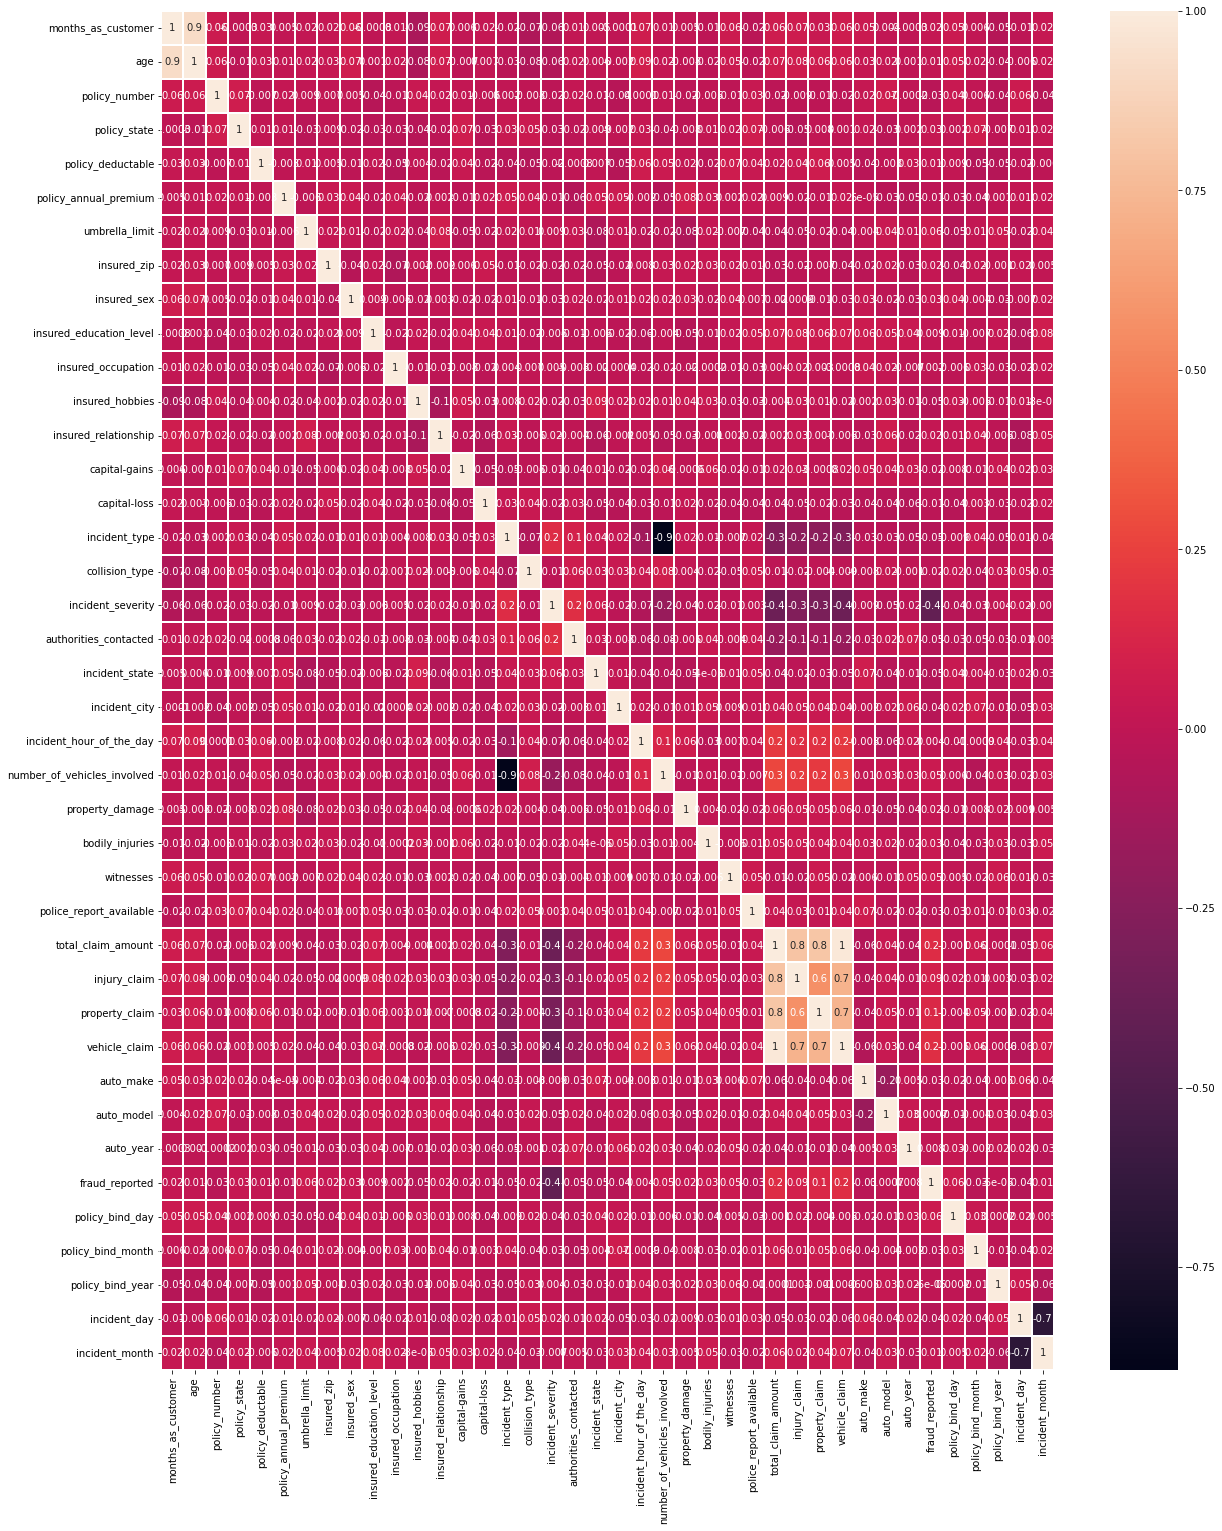

In [36]:
plt.figure(figsize=(20,25))
corr = loan_data.corr()
sns.heatmap(data=corr, annot=True, fmt='.1g' ,linewidth= 2)
plt.show()

Plots for comparing and managing data

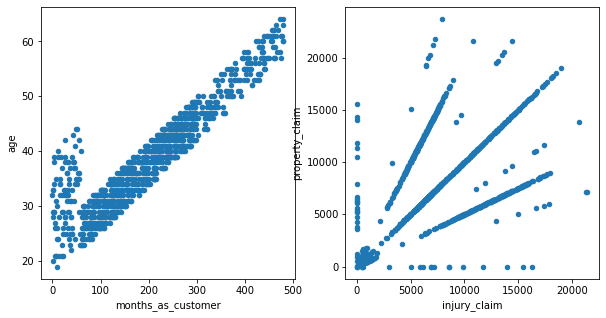

In [37]:
fig ,axs =plt.subplots(1,2)
loan_data.plot(kind='scatter',x='months_as_customer',y='age', ax=axs[0] ,figsize=(12,8))
loan_data.plot(kind='scatter',x='injury_claim',y='property_claim', ax=axs[1] ,figsize=(10,5))
fig.savefig('testdata.jpg')

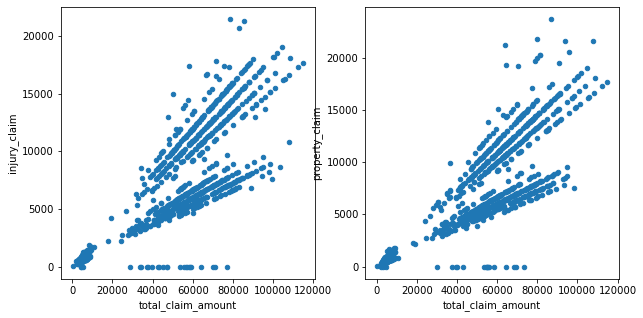

In [38]:
fig ,axs =plt.subplots(1,2)
loan_data.plot(kind='scatter',x='total_claim_amount',y='injury_claim', ax=axs[0] ,figsize=(12,8))

loan_data.plot(kind='scatter',x='total_claim_amount',y='property_claim', ax=axs[1] ,figsize=(10,5))
fig.savefig('testdata.jpg')

In [39]:
loan_data.drop(['total_claim_amount'],axis=1,inplace=True)


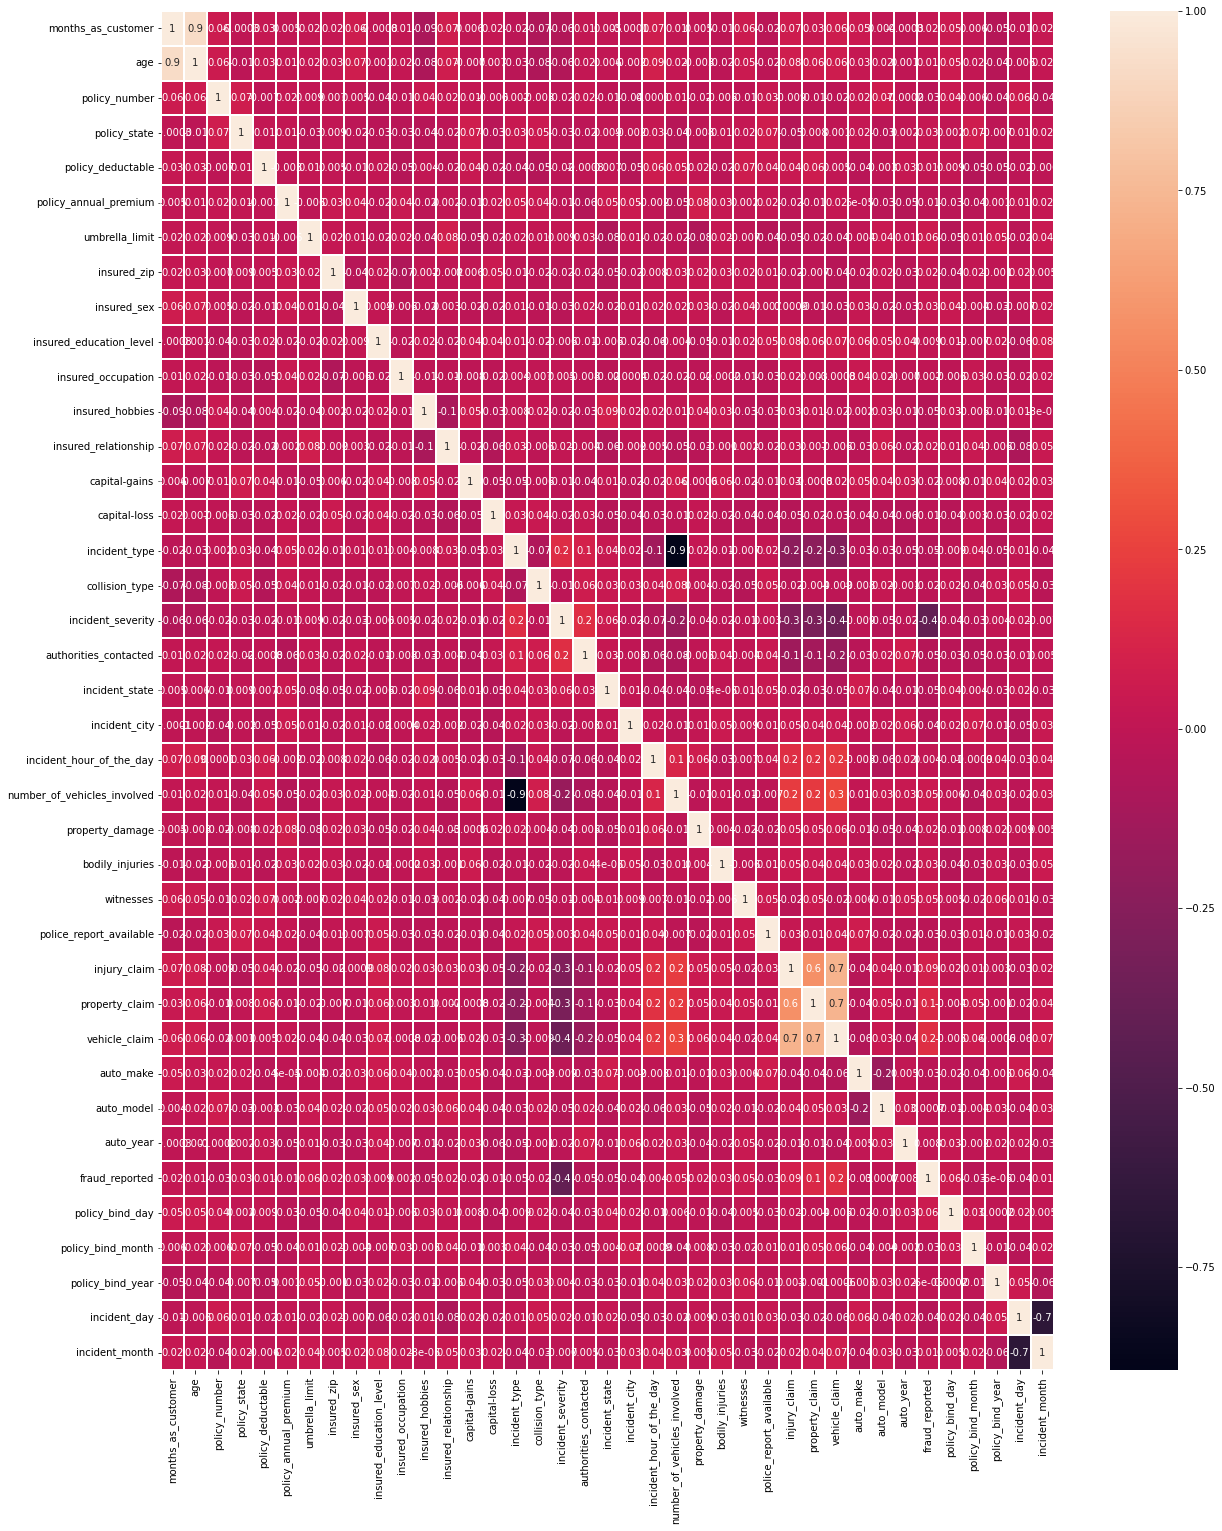

In [40]:
plt.figure(figsize=(20,25))
corr = loan_data.corr()
sns.heatmap(data=corr, annot=True, fmt='.1g' ,linewidth= 2)
plt.show()

# Checking outliers

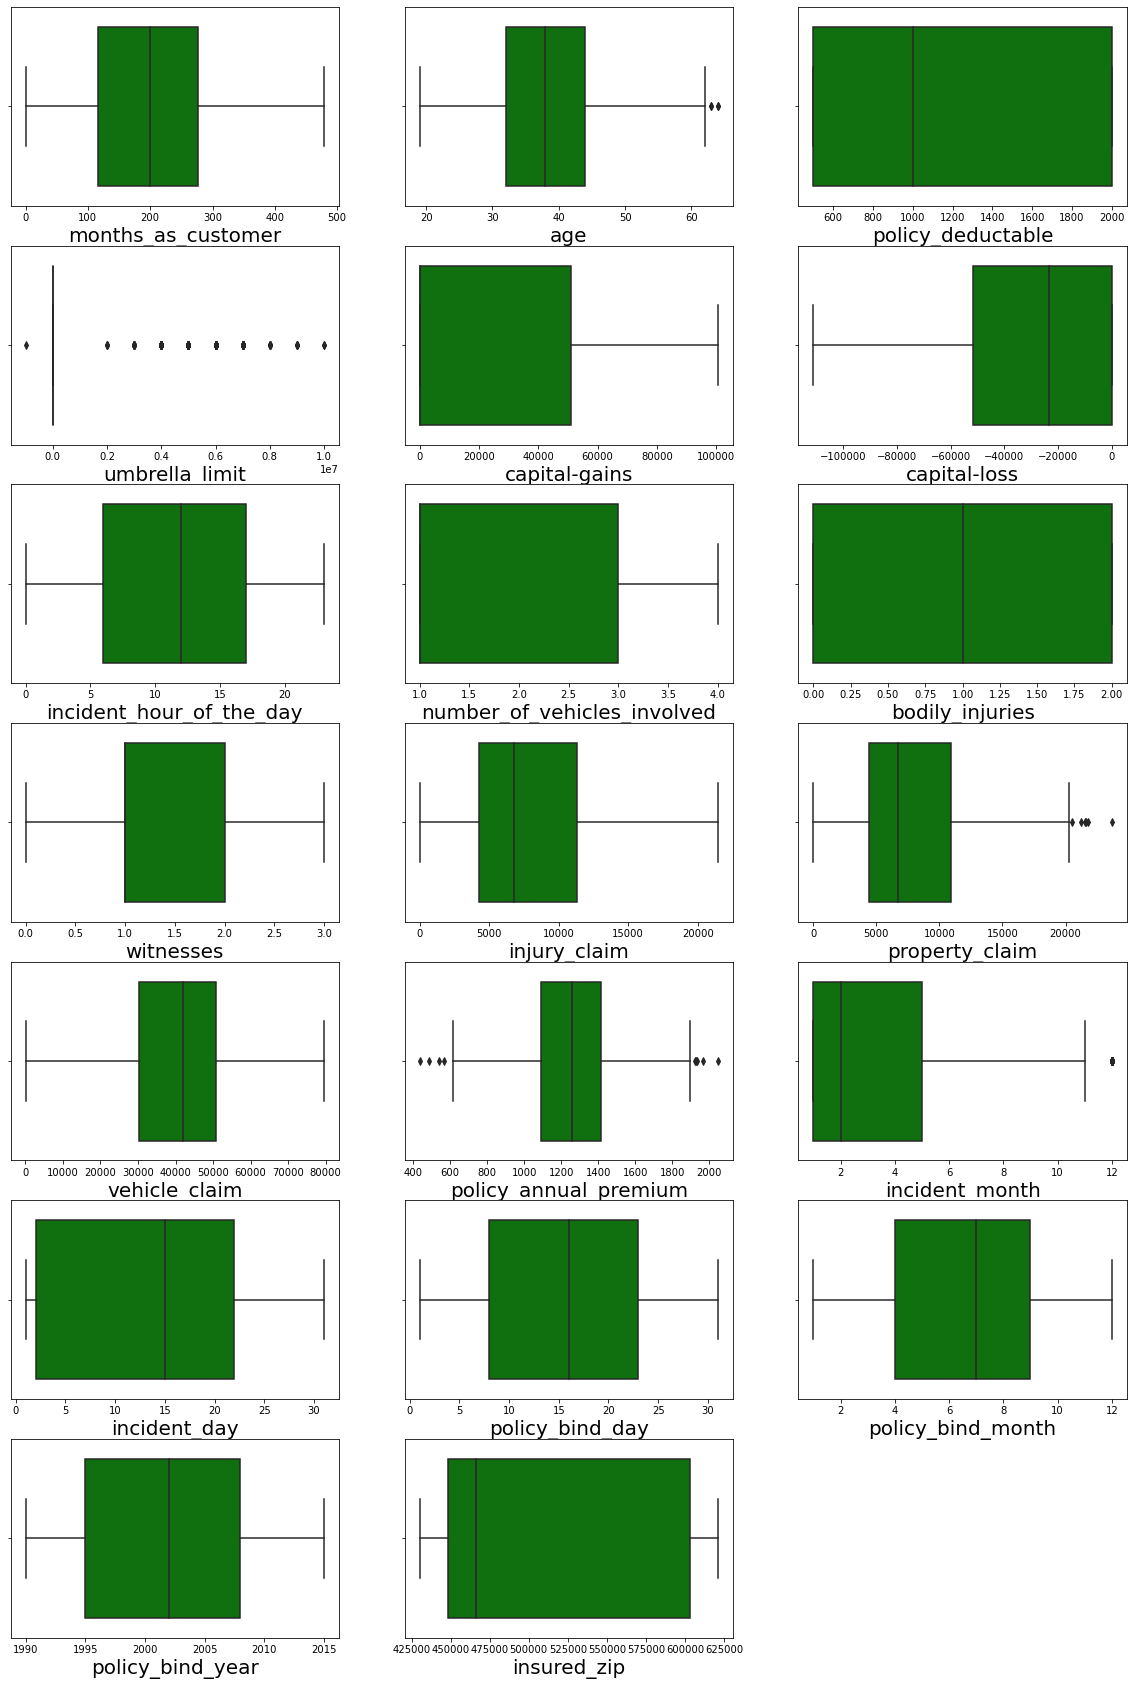

In [41]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=25:
        ax=plt.subplot(7,3,plotnumber)
        sns.boxplot(loan_data[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Managing Outliers

In [42]:
loan_data.drop(['policy_csl'],axis=1,inplace=True)

In [43]:
from scipy.stats import zscore
z = np.abs(zscore(loan_data))
threshold = 3
claim = loan_data[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", loan_data.shape)
print ("Shape of the dataframe after removing outliers: ", claim.shape)
print ("Percentage of data loss post outlier removal: ", (loan_data.shape[0]-claim.shape[0])/loan_data.shape[0]*100)

loan_data=claim.copy()

Shape of the dataframe before removing outliers:  (1000, 39)
Shape of the dataframe after removing outliers:  (980, 39)
Percentage of data loss post outlier removal:  2.0


# Checking Skewness of features

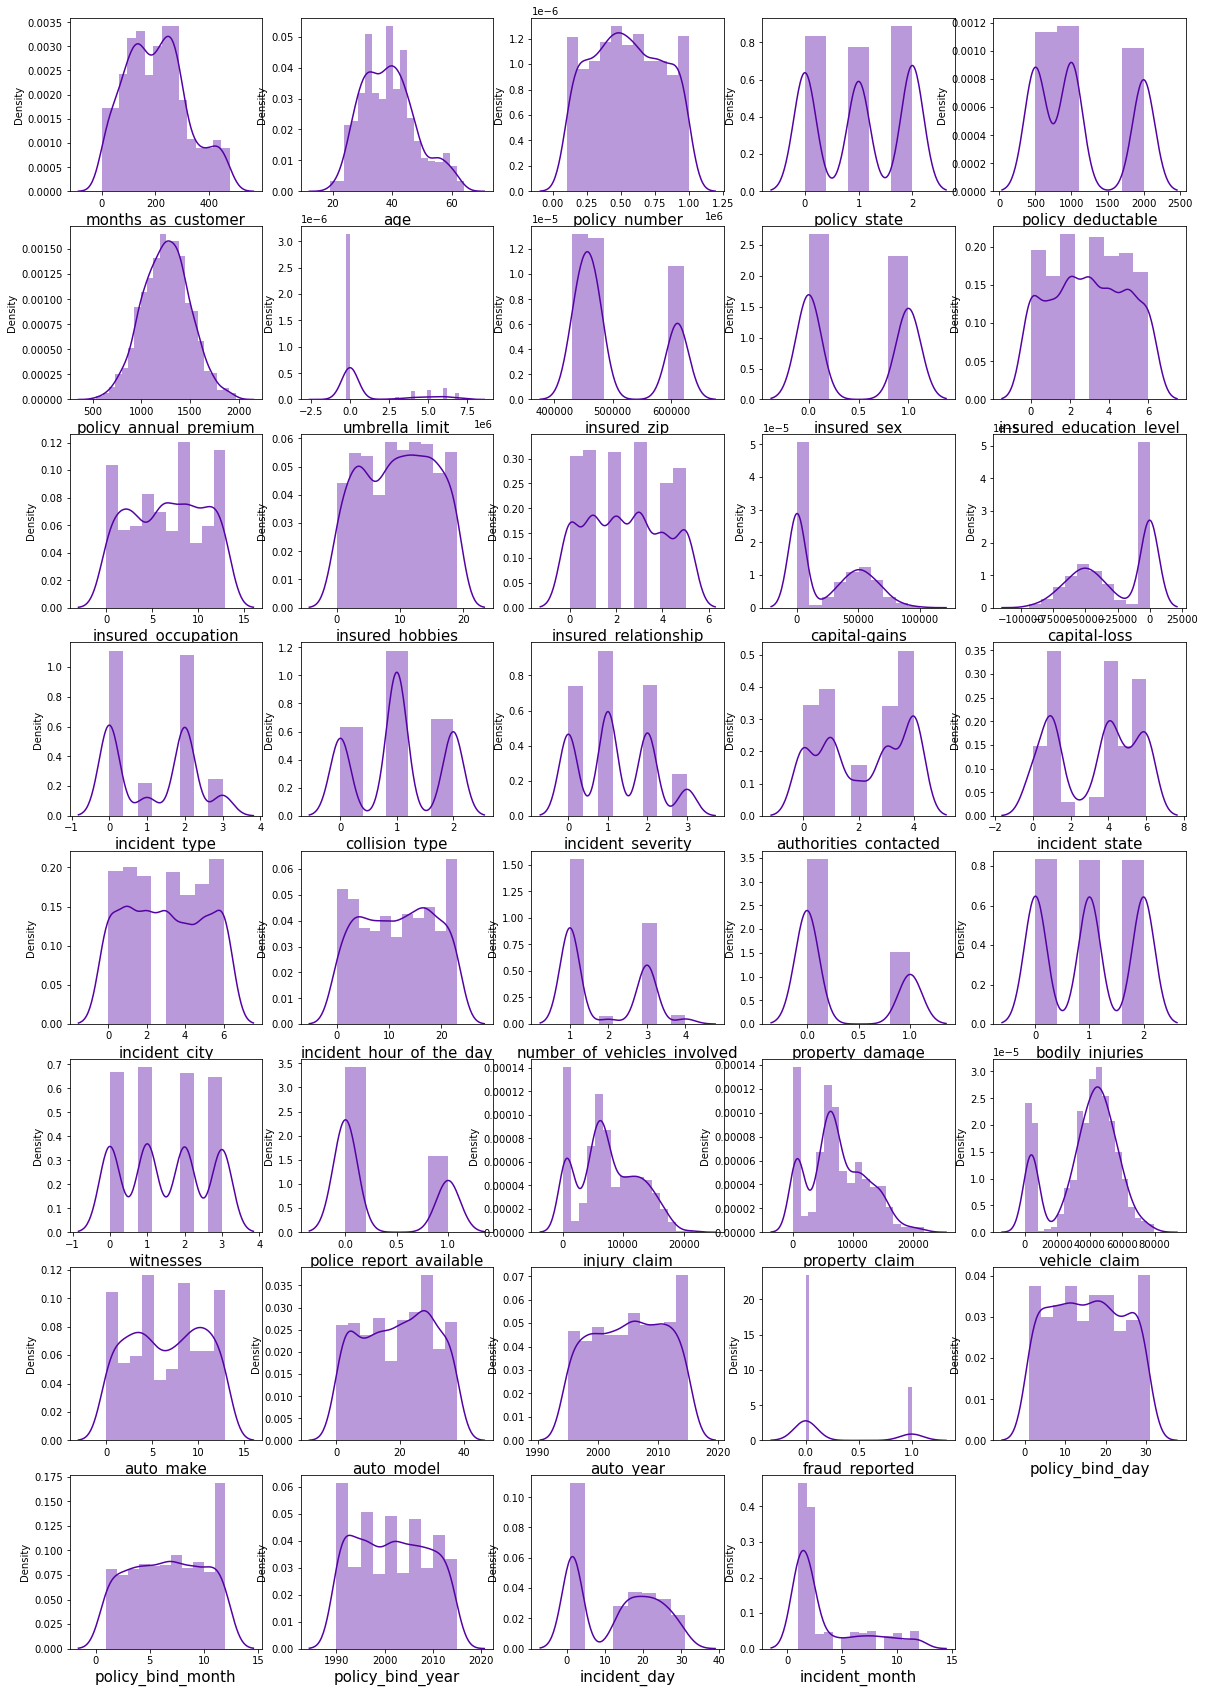

In [44]:
plt.figure(figsize=(20,30),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in loan_data:
    if plotnum<=40:
        plt.subplot(8,5,plotnum)
        sns.distplot(loan_data[col])
        plt.xlabel(col,fontsize=15)
    plotnum+=1
plt.show()

In [45]:
loan_data.skew()

months_as_customer             0.362608
age                            0.475385
policy_number                  0.036283
policy_state                  -0.038157
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_zip                    0.837283
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_type                  0.090563
collision_type                -0.032778
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
property_damage                0.853093
bodily_injuries                0.003757


In [46]:
# Making the skew less than or equal to +0.5 and -0.5 for better prediction using yeo-johnson method
skew=['umbrella_limit','vehicle_claim','insured_zip','property_damage','incident_month']

# Importing Powertransformer
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
loan_data[skew] = scaler.fit_transform(loan_data[skew].values)

In [47]:
loan_data.skew()

months_as_customer             0.362608
age                            0.475385
policy_number                  0.036283
policy_state                  -0.038157
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                -7.932397
insured_zip                    0.000000
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_type                  0.090563
collision_type                -0.032778
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
property_damage                0.853093
bodily_injuries                0.003757


# count

In [48]:
loan_data.fraud_reported.value_counts()

0    740
1    240
Name: fraud_reported, dtype: int64

In [49]:
X = loan_data.drop(columns = ['fraud_reported'],axis=1)
Y = loan_data['fraud_reported']

In [50]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

# Standard Scaler

In [51]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

# Inflation factor

In [52]:
 from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

VIF values                     Features
0     6.913357           months_as_customer
1     6.906284                          age
2     1.051573                policy_number
3     1.072951                 policy_state
4     1.060427            policy_deductable
5     1.044354        policy_annual_premium
6     1.043789               umbrella_limit
7          NaN                  insured_zip
8     1.072982                  insured_sex
9     1.064695      insured_education_level
10    1.028889           insured_occupation
11    1.073256              insured_hobbies
12    1.057331         insured_relationship
13    1.069319                capital-gains
14    1.071780                 capital-loss
15    3.658774                incident_type
16    1.096221               collision_type
17    1.303882            incident_severity
18    1.121870        authorities_contacted
19    1.074385               incident_state
20    1.061901                incident_city
21    1.111287     incident_hour_of_the_day
22    3.575595  number_of_vehicles_involved
23    1.060313              property_damage
24    1.053266              bodily_injuries
25    1.064317                    witnesses
26    1.079707      police_report_available
27    1.959313                 injury_claim
28    2.100573               property_claim
29    3.085175                vehicle_claim
30    1.090042                    auto_make
31    1.084603                   auto_model
32    1.051557                    auto_year
33    1.033025              policy_bind_day
34    1.053332            policy_bind_month
35    1.052310             policy_bind_year
36    1.976069                 incident_day
37    1.971154               incident_month

# Split , Train , Test

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=99, test_size=.3)
print('Training feature size:',X_train.shape)
print('Training target size:',Y_train.shape)
print('Test feature size:',X_test.shape)
print('Test target size:',Y_test.shape)

Training feature size: (1036, 38)
Training target size: (1036,)
Test feature size: (444, 38)
Test target size: (444,)


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.6238738738738738 on Random_state 9


# General function for train ,test,and predict to find insurance claim frauds

In [60]:
def model_val(model,X,Y):
    X_train,X_test,Y_train,Y_test =  train_test_split(X,Y,test_size=.30,random_state=9)
    model.fit( X_train,Y_train)
    y_pred=model.predict(X_test)
    print("Accuracy is ", model.score(X_test,Y_test)*100)
    score= cross_val_score(model,X,Y,cv=5) 
    print("Cross validation score is ", np.mean(score)*100)

# Logistics Regression Model

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
model= LogisticRegression()
model_val(model,X,Y)

Accuracy is  62.387387387387385
Cross validation score is  55.067567567567565


# DecisionTreeClassifier

In [62]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()
model_val(model,X,Y)
#classification_report(Y_test, y_pred)

Accuracy is  81.08108108108108
Cross validation score is  81.6891891891892


# Decision Tree
Decision tree is a type of supervised learning algorithm(having a pre-defined target variable) that is mostly used in classification problems. In this technique, we split the population or sample into two or more homogeneous sets(or sub-populations) based on most significant splitter / differentiator in input variables.

Decision trees use multiple algorithms to decide to split a node in two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can say that purity of the node increases with respect to the target variable.

# RandomForestClassifier

In [63]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
model_val(model,X,Y)

Accuracy is  87.83783783783784
Cross validation score is  86.21621621621621


# Random Forest
RandomForest is a tree based bootstrapping algorithm wherein a certain no. of weak learners (decision trees) are combined to make a powerful prediction model. For every individual learner, a random sample of rows and a few randomly chosen variables are used to build a decision tree model. Final prediction can be a function of all the predictions made by the individual learners. In case of regression problem, the final prediction can be mean of all the predictions

# ExtraTreesClassifier

In [64]:
from sklearn.ensemble import ExtraTreesClassifier
model= ExtraTreesClassifier()
model_val(model,X,Y)

Accuracy is  88.73873873873875
Cross validation score is  86.35135135135134


# SGDClassifier

In [65]:
from sklearn.linear_model import SGDClassifier
model= SGDClassifier()
model_val(model,X,Y)

Accuracy is  50.67567567567568
Cross validation score is  54.25675675675675


# AdaBoostClassifier

In [66]:
from sklearn.ensemble import AdaBoostClassifier
model= AdaBoostClassifier()
model_val(model,X,Y)

Accuracy is  86.03603603603604
Cross validation score is  83.5810810810811


# KNeighborsClassifier

In [68]:
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier()
model_val(model,X,Y)

Accuracy is  65.990990990991
Cross validation score is  68.37837837837839


# SVC

In [69]:
from sklearn.svm import SVC
model= SVC()
model_val(model,X,Y)

Accuracy is  52.25225225225225
Cross validation score is  52.77027027027027


# Hyper Parameter Tuning : GridSearchCV

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [69]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.832 total time=   0.0s
[CV 2/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.802 total time=   0.0s
[CV 3/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.787 total time=   0.0s
[CV 4/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.807 total time=   0.0s
[CV 5

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=10)

In [70]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 40,
 'max_features': 'auto',
 'n_estimators': 25}

In [72]:
model=RandomForestClassifier(n_estimators=25,criterion='gini', bootstrap= True, max_depth=40, max_features='auto')
model_val(model,X,Y)

Accuracy is  85.36036036036036
Cross validation score is  86.82432432432434


# Final Model for next day rain prediction

In [73]:
Final_mod = RandomForestClassifier(n_estimators=25,criterion='gini', bootstrap= True, max_depth=40, max_features='auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8333333333333334


# Save Model

In [74]:
import joblib
joblib.dump(Final_mod,'claim_Status.pkl')

['claim_Status.pkl']